In [128]:
import scipy.signal as sg
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft

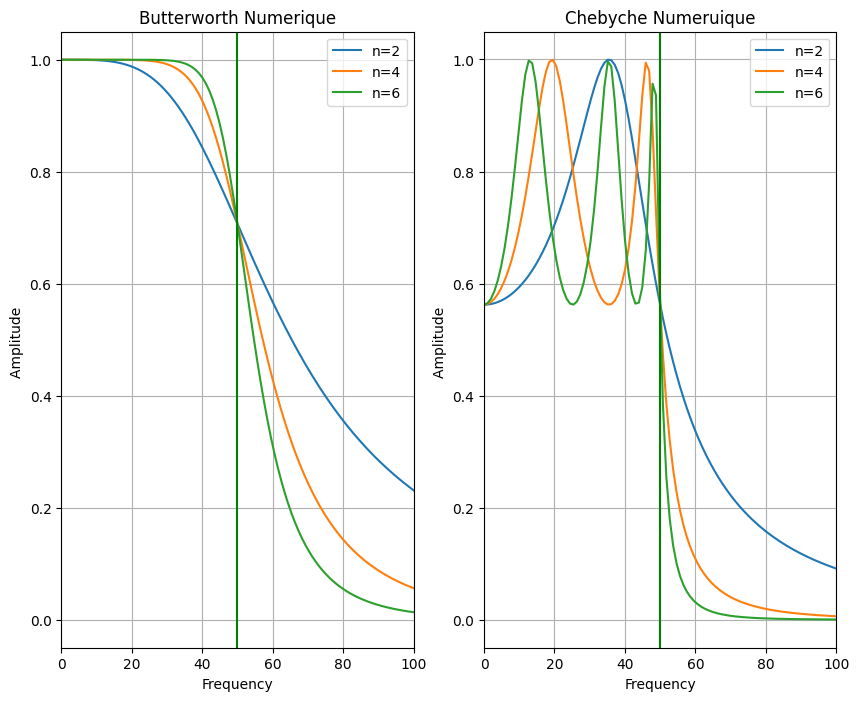

In [106]:
orde=[2,4,6]
fs=1000
fig,axe=plt.subplots(1,2,figsize=(10,8))
for i in orde:
    b, a = sg.butter(i,50, 'low',fs=fs)
    w, h = sg.freqz(b, a)
    axe[0].plot((w*fs*0.5)/np.pi,np.abs(h),label=f"n={i}")
axe[0].legend()
axe[0].set_title('Butterworth Numerique')
axe[0].set_xlabel('Frequency')
axe[0].set_ylabel('Amplitude ')
axe[0].set_xlim([0,100])
axe[0].grid(which='both', axis='both')
axe[0].axvline(50, color='green')

for i in orde:
    b, a = sg.cheby1(i,5,50, 'low',fs=fs)
    w, h = sg.freqz(b, a)
    axe[1].plot((w*fs*0.5)/np.pi,np.abs(h),label=f"n={i}")
axe[1].legend()
axe[1].set_title('Chebyche Numeruique')
axe[1].set_xlabel('Frequency')
axe[1].set_ylabel('Amplitude ')
axe[1].set_xlim([0,100])
axe[1].grid(which='both', axis='both')
axe[1].axvline(50, color='green')

# Exercice 2 – Application d’un filtre de Butterworth sur un signal

# 1. Tracer le signal x(t) sur l’intervalle de temps [0, 1]

In [116]:
def create_signal(t):
    return np.sin(2*np.pi*5*t)+np.sin(2*np.pi*20*t)+np.sin(2*np.pi*35*t)

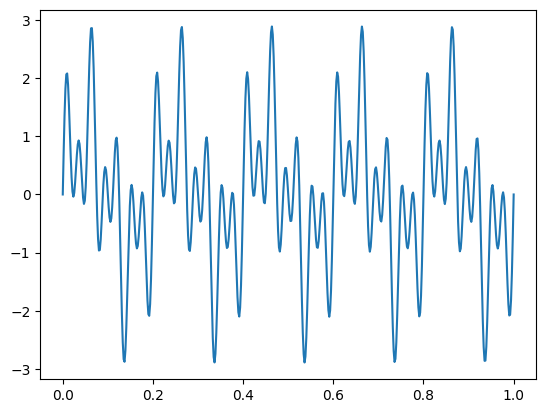

In [124]:
Fe=512
x=np.linspace(0,1,Fe)
signal=[create_signal(i) for i in  x]
plt.plot(x,signal)

# 2. Afficher le spectre du signal x(t) entre −Fe/2 et Fe/2

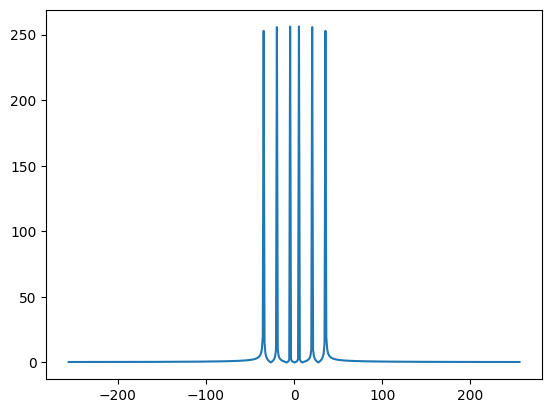

In [137]:
freq=np.linspace(-Fe/2,Fe/2,Fe)
plt.plot(freq,np.abs(np.fft.fftshift(fft(signal,Fe))))
plt.show()

# 2. Afficher le spectre du signal x(t) entre  −40 et 40

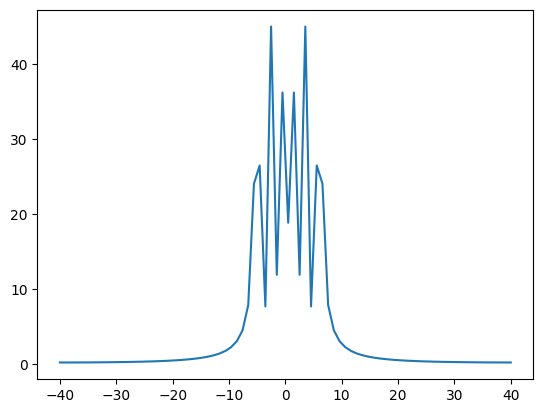

In [143]:
freq=np.linspace(-40,40,80)
plt.plot(freq,np.abs(np.fft.fftshift(fft(signal,80))))
plt.show()

## 3. On souhaite éliminer f2 du signal. Quel type de filtre faut-il mettre en oeuvre ?

On utilise un filtre coupe bande

## 4. Faire la synthèse de ce filtre en utilisant un filtre de Butterworth. Faire varier les paramètres ( largeur
## de bande, ordre du filtre). Pour cette partie, vous utiliserez la sortie ’sos’ de la fonction butter
## 5. Appliquer ce filtre (signal.sosfilt) au signal x et afficher le signal resultat, ainsi que son spectre

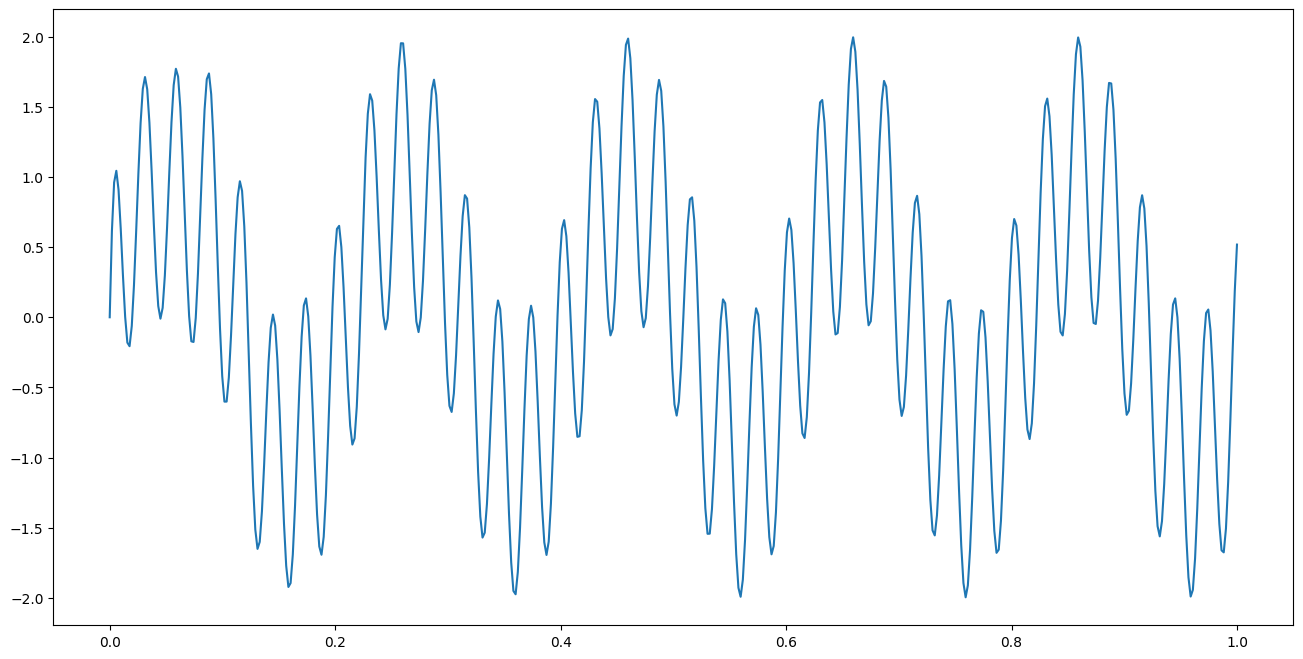

In [169]:
orde=[2,4,6]
plt.figure(figsize=(16,8))
sos= sg.butter(4,[15,25],'bandstop',output='sos',fs=Fe)
signal_filtre = sg.sosfilt(sos, signal)
plt.plot(x,signal_filtre)

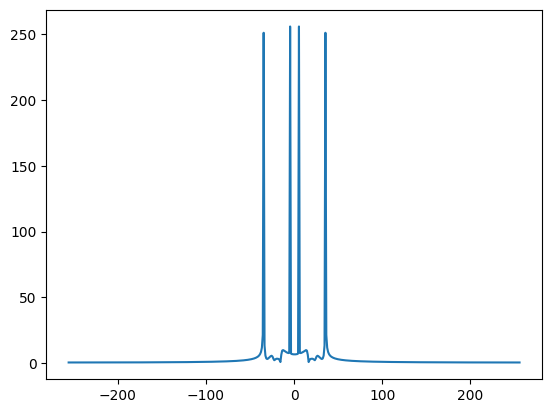

In [170]:
freq=np.linspace(-Fe/2,Fe/2,Fe)
plt.plot(freq,np.abs(np.fft.fftshift(fft(signal_filtre,Fe))))
plt.show()

## 6. Mesurer l’erreur entre le signal attendu et le signal obtenu. De quels échantillons vient cette erreur ?

In [173]:
def create_signal_filtre(t):
    # je supprime sin (2πf2t)
    return np.sin(2*np.pi*5*t)+np.sin(2*np.pi*35*t)

Text(0.5, 1.0, 'Signal filtre avec coupe bande')

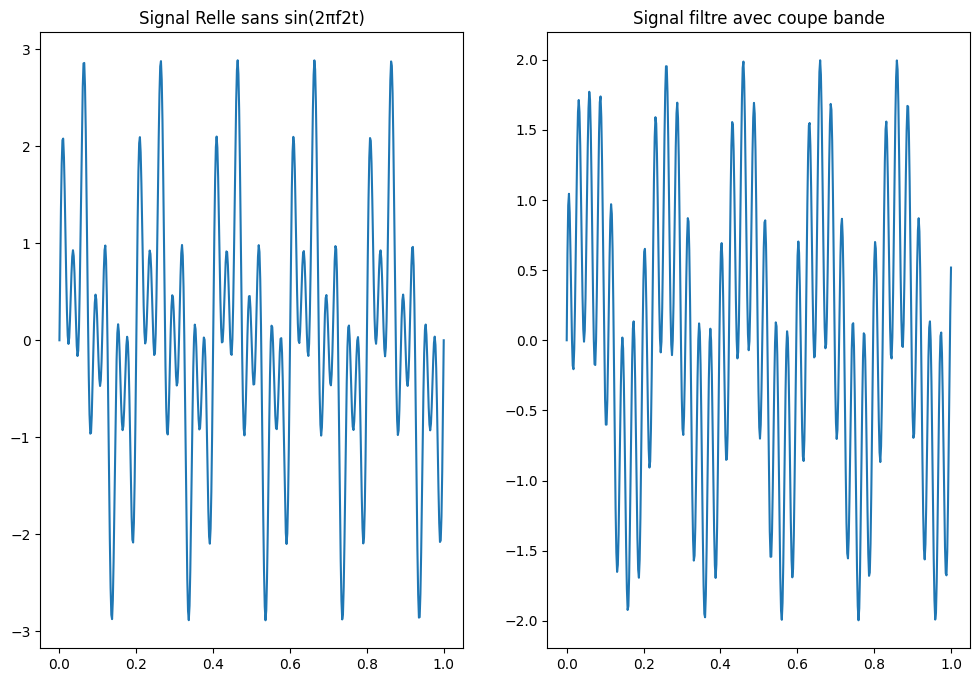

In [177]:
Fe=512
x=np.linspace(0,1,Fe)
signal_reel=[create_signal(i) for i in  x]
fig,axe=plt.subplots(1,2,figsize=(12,8))
axe[0].plot(x,signal_reel)
axe[0].set_title('Signal Relle sans sin(2πf2t)')
axe[1].plot(x,signal_filtre)
axe[1].set_title('Signal filtre avec coupe bande')

# 6. Mesurer l’erreur entre le signal attendu et le signal obtenu. De quels échantillons vient cette erreur ?

In [184]:
def ErrerRMSE(s1,s2):
    return np.sqrt(sum((s1-s2)**2))*len(s1)**-1

In [186]:
def ErrerMAE(s1,s2):
    return sum(np.abs((s1-s2)))*len(s1)**-1

In [185]:
signal_reel=np.array(signal_reel)
ErrerRMSE(signal_filtre,signal_reel)

0.04594065891497435

In [187]:
signal_reel=np.array(signal_reel)
ErrerMAE(signal_filtre,signal_reel)

0.8100758554281662

# Errer RMSE

(0.0, 10.0)

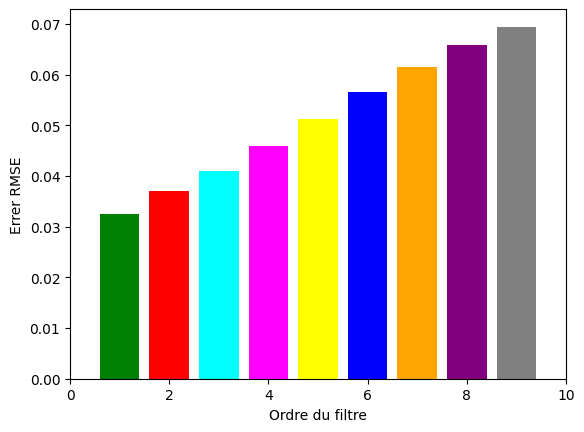

In [193]:
ordre=[i for i in  range(1,10)]
Errer=[]
for i in  ordre:
    sos=sg.butter(i,[15,25],'bandstop',output='sos',fs=Fe)
    signal_filtre = sg.sosfilt(sos, signal)
    Errer.append(ErrerRMSE(signal_filtre,signal_reel))
x=[i for i in range(1,10)]
plt.bar(x,Errer,color=['green','red','cyan','magenta','yellow','blue','orange','purple','gray','black'])

plt.xlabel('Ordre du filtre')
plt.ylabel('Errer RMSE')
plt.xlim([0,10])

# Errer MAE

(0.0, 10.0)

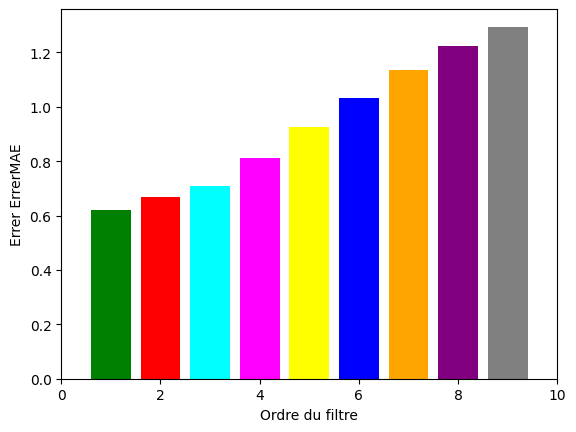

In [194]:
ordre=[i for i in  range(1,10)]
Errer=[]
for i in  ordre:
    sos=sg.butter(i,[15,25],'bandstop',output='sos',fs=Fe)
    signal_filtre = sg.sosfilt(sos, signal)
    Errer.append(ErrerMAE(signal_filtre,signal_reel))
x=[i for i in range(1,10)]
plt.bar(x,Errer,color=['green','red','cyan','magenta','yellow','blue','orange','purple','gray','black'])

plt.xlabel('Ordre du filtre')
plt.ylabel('Errer ErrerMAE')
plt.xlim([0,10])